# Create Mask From Image

## Go to the bottom of the to run this program for all the iterations

## Overview:
In this program we will use plotly to create 50 separate images. All of the images will be identical in size and composition, EXCEPT, one state will be colored gray in each image.

We will use thresholding around the grey area of the images to turn everything except the grey area black, and everything inside the grey area white. 

This white area will be the mask for each state.

# Create US State Masks

## Create 50 US plots with a Gray State

### ref - using geographical plots in plotly - https://www.geeksforgeeks.org/python-geographical-plotting-using-plotly/

In [1]:
# importing all necessary libraries 
import plotly
import plotly.plotly as py 
import plotly.graph_objs as go 
import pandas as pd 
import time

# some more libraries to plot graph 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 

In [2]:
# List of US States for ref
states = [ "CA", "AK", "AZ", "AR", "AL", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [40]:
i = 0
# To establish connection 
init_notebook_mode(connected = True) 
  
# type defined is choropleth to 
# plot geographical plots 
data = dict(type = 'choropleth', 
  
            # location: Arizoana, California, Newyork 
            locations = [states[i]], 
              
            # States of USA 
            locationmode = 'USA-states', 
            # Hide Colorbar
            showscale=False,
            # colorscale can be added as per requirement 
            colorscale = 'greys', 
            # choose the color to fill the state
            z = [0])
            
            # give the image a tight layout
            # margin=dict(l=80, r=80, t=100, b=80))

            # colorbar = {'title': 'Colorbar Title Goes Here'}) 
              
# Adjust layout of image
layout = go.Layout(geo={'scope': 'usa'},
                    margin=go.layout.Margin(
                        l=0,
                        r=0,
                        b=0,
                        t=0,
                        pad=0))
                             
# pass data dictionary as a list  
choromap = go.Figure(data = [data], layout = layout) 
  
# plot graph
plot(choromap,
     auto_open=False,
     image = 'png',
     image_filename='plot_image',
     output_type='file',
     image_width='50%',
     image_height='50%', 
     filename='temp-plot.html',
     validate=False)


# Save figure to file

plotly.io.write_image(choromap, 
                      'small_scale_us_states/'+str(states[i])+'.png', 
                      format='png',
                      scale=5, # Adjust the image dimensions
                      validate=False)


## Threshold the US state 

- ### open a us state

    - #### remove the black lines from the image
    
    - #### make everything but the grey area black
    
    - #### make the grey area white 
    
  
- ### save the state mask

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

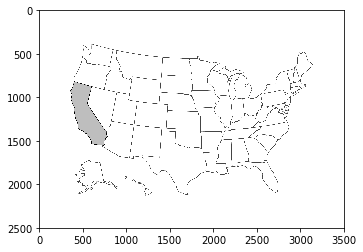

In [42]:
# import image as greyscale
img = cv2.imread('small_scale_us_states/'+str(states[i])+'.png',0)
plt.imshow(img,cmap='gray')

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning:

Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/matplotlib/axes/_base.py:3471: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5



array([], shape=(0, 0), dtype=uint8)

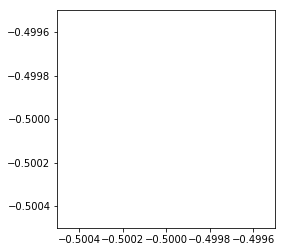

In [32]:
# the grey is 190/255 
plt.imshow(img[1000:1500,450:750],cmap='gray')
img[1000:1500,450:750]


In [22]:
# get unique colors 
np.unique(img)


array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## Threshold above and below grey value
- ### the grey value is 190/255

- ### use THRESH_TOZERO_INV to set values above 190 to zero

- ### use THRESH_TOZERO to set values below 190 to zero

- ### use THRESH_BINARY to set values equal to 190 to 255

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

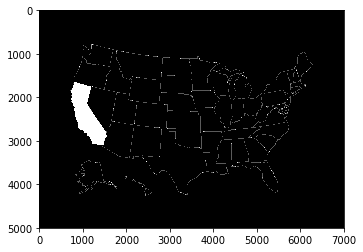

In [23]:
# use THRESH_TOZERO_INV to set values greater than 190 to zero
val = 190
val, thresh_img = cv2.threshold(img,val,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh_img,cmap='gray')
# get unique colors 
np.unique(thresh_img)

array([  0, 190], dtype=uint8)

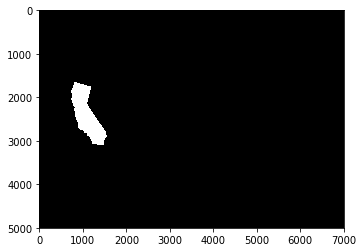

In [24]:
# use THRESH_TOZERO to set values less than or equal to 189 to zero
val = 189
val, thresh_thresh_img = cv2.threshold(thresh_img,val,255,cv2.THRESH_TOZERO)
plt.imshow(thresh_thresh_img,cmap='gray')
# get unique colors 
np.unique(thresh_thresh_img)

array([  0, 255], dtype=uint8)

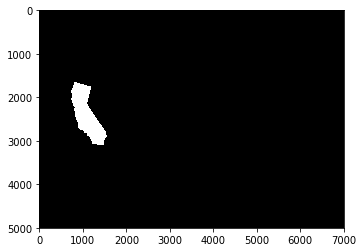

In [70]:
# use THRESH_BINARY to set values greater than 189 to 255
val = 189
val, thresh_thresh_thresh_img = cv2.threshold(thresh_thresh_img,val,255,cv2.THRESH_BINARY)
plt.imshow(thresh_thresh_thresh_img,cmap='gray')
# get unique colors 
np.unique(thresh_thresh_thresh_img)

In [71]:
# Store the 1-channel mask
mask_1chan = thresh_thresh_thresh_img

## Save the 3-channel mask for Final Image Blend
- ### Import the image

- ### Make an empty 3-channel matrix with the size of the original image and all 255 vals

In [72]:
# Import 3-channel version of image
img_3chan = cv2.imread('small_scale_us_states/'+str(states[i])+'.png',1)

# Make empty array with dimensions of 3-channel image
full_img = np.full(img_3chan.shape,255,dtype='uint8')

# Make 1 3-channel image with bitwise_or on the two images and the 1-channel mask
mask_3chan = cv2.bitwise_or(full_img,full_img,mask=mask_1chan)

(5000, 7000, 3)

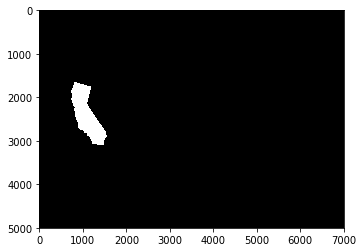

In [73]:
plt.imshow(mask_3chan)
mask_3chan.shape

# Save the 3-channel mask

In [75]:
# Save state mask to file
cv2.imwrite('small_scale_us_states_masks/'+str(states[0])+'_mask.png',mask_3chan)

True

# Make a Function to Get Masks for all the States (with Only the Essentials )

In [17]:
# importing all necessary libraries 
import plotly
import plotly.plotly as py 
import plotly.graph_objs as go 
import pandas as pd 
import time

# some more libraries to plot graph 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [19]:
# List of US States for ref
states = [ "CA", "AK", "AZ", "AR", "AL", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [14]:
def get_state_mask(state,scale):
    '''
    This function is used to loop through 50 states and save their 50 masks to a folder
    
    input:
    - state: the state initials

    - scale: the multiple used to adjust the size of the image
    -> when making a wordcloud with a mask, it is more computationally effective to create 
       it the cloud with a smaller mask then to increase its size by a scale factor
    '''
    # To establish connection 
    init_notebook_mode(connected = True) 

    # To pause after making a connetion
    time.sleep(1)
    
    # type defined is choropleth to 
    # plot geographical plots 
    data = dict(type = 'choropleth', 

                # location: Arizoana, California, Newyork 
                locations = [state], 

                # States of USA 
                locationmode = 'USA-states', 
                # Hide Colorbar
                showscale=False,
                # colorscale can be added as per requirement 
                colorscale = 'greys',                 
                # choose the color to fill the state
                z = [0])

    # Adjust layout of image
    layout = go.Layout(geo={'scope': 'usa'},
                        margin=go.layout.Margin(
                            l=0,
                            r=0,
                            b=0,
                            t=0,
                            pad=0))

    # pass data dictionary as a list  
    choromap = go.Figure(data = [data], layout = layout) 

    
    # Save figure to file
    plotly.io.write_image(choromap, 
                          'us_states/'+str(state)+'_scale_'+str(scale)+'.png', 
                          format='png',
                          # Adjust the image dimensions
                          scale=scale, 
                          validate=False)

    # import image as greyscale
    img = cv2.imread('us_states/'+str(state)+'_scale_'+str(scale)+'.png',0)
    
    # use THRESH_TOZERO_INV to set values greater than 190 to zero
    val = 190
    val, thresh_img = cv2.threshold(img,val,255,cv2.THRESH_TOZERO_INV)
    
    # use THRESH_TOZERO to set values less than or equal to 189 to zero
    val = 189
    val, thresh_thresh_img = cv2.threshold(thresh_img,val,255,cv2.THRESH_TOZERO)
    
    # use THRESH_BINARY to set values greater than 189 to 255
    val = 189
    val, thresh_thresh_thresh_img = cv2.threshold(thresh_thresh_img,val,255,cv2.THRESH_BINARY)
                             
    # Store the 1-channel mask
    mask_1chan = thresh_thresh_thresh_img
                             
    # Import 3-channel version of image
    img_3chan = cv2.imread('us_states/'+str(state)+'_scale_'+str(scale)+'.png',1)

    # Make empty array with dimensions of 3-channel image
    full_img = np.full(img_3chan.shape,255,dtype='uint8')

    # This bitwise_or function combines the two white images in all 3 channals only in
    # the area where the mask is 255
    mask_3chan = cv2.bitwise_or(full_img,full_img,mask=mask_1chan)
    
    # Save state mask to file
    cv2.imwrite('us_states_masks/'+str(state)+'_scale_'+str(scale)+'_mask.png',mask_3chan)

# Get all of the masks!

In [15]:
scale = 5
scale_factor = 2
# Iterate through every state with the state mask function for small scale masks
[get_state_mask(state,scale) for state in states]

# Iterate through every state with the~~ state mask function for full small scale masks
[get_state_mask(state,scale*scale_factor) for state in states]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Save the Scale and Scale Factor

In [20]:
# save the scale and scale_factor used to make the small_scale and full scale images
with open('scale_and_scale_factor.txt','w+') as output:
    output.write(str(scale)+','+str(scale_factor))

# Store a Single Full Scale US image 

In [21]:
# Store Single Full Scale US image in US word cloud folder

## To establish connection 
init_notebook_mode(connected = True) 

## type defined is choropleth to 
## plot geographical plots 
data = dict(type = 'choropleth', 
            # States of USA 
            locationmode = 'USA-states')

## Adjust layout of image
layout = go.Layout(geo={'scope': 'usa'},
                    margin=go.layout.Margin(
                        l=0,
                        r=0,
                        b=0,
                        t=0,
                        pad=0))

## pass data dictionary as a list  
choromap = go.Figure(data = [data], layout = layout) 


## Save figure to file
plotly.io.write_image(choromap, 
                      'us_map/US_map_scale_'+str(scale*scale_factor)+'.png', 
                      format='png',
                      # Adjust the image dimensions
                      scale=scale*scale_factor, 
                      validate=False)
